In [ ]:
!sudo yum -y install cmake
!sudo pip3 install face_recognition
!sudo pip3 install opencv-python-headless

## Import

Reconnaissance des visages avec face_recognition

In [2]:
from PIL import Image
import face_recognition

#%matplotlib notebook

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

In [3]:
fconstantin_image = face_recognition.load_image_file("data/fconstantin.jpg")
fconstantin_face_encoding = face_recognition.face_encodings(fconstantin_image)[0]

known_face_encodings = [
    fconstantin_face_encoding
]

known_face_names = [
    "Francois CONSTANTIN"
]

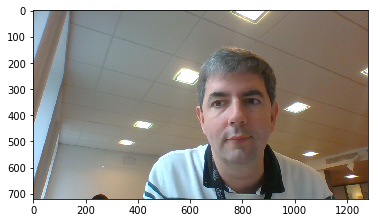

In [4]:
imshow(np.asarray(fconstantin_image))

In [6]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

video_capture = cv2.VideoCapture('http://localhost:8081/video.mjpg')

ret, frame = video_capture.read()

while True:
    ret, frame = video_capture.read()
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]
                print("Is the unknown face a picture of ? {}".format(name))

            face_names.append(name)

    #process_this_frame = not process_this_frame

    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

video_capture.release()

KeyboardInterrupt: 